In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/oral-disease-dataset/ulcers/Mouth_Ulcer_0_3096.jpeg
/kaggle/input/oral-disease-dataset/ulcers/Mouth_Ulcer_0_6613.jpeg
/kaggle/input/oral-disease-dataset/ulcers/Mouth_Ulcer_0_3243.jpeg
/kaggle/input/oral-disease-dataset/ulcers/Mouth_Ulcer_0_8624.jpeg
/kaggle/input/oral-disease-dataset/ulcers/Mouth_Ulcer_0_6328.jpeg
/kaggle/input/oral-disease-dataset/ulcers/Mouth_Ulcer_0_4451.jpeg
/kaggle/input/oral-disease-dataset/ulcers/Mouth_Ulcer_0_544.jpeg
/kaggle/input/oral-disease-dataset/ulcers/Mouth_Ulcer_0_8668.jpeg
/kaggle/input/oral-disease-dataset/ulcers/Mouth_Ulcer_0_9949.jpeg
/kaggle/input/oral-disease-dataset/ulcers/Mouth_Ulcer_0_5724.jpeg
/kaggle/input/oral-disease-dataset/ulcers/Mouth_Ulcer_0_5250.jpeg
/kaggle/input/oral-disease-dataset/ulcers/Mouth_Ulcer_0_4420.jpeg
/kaggle/input/oral-disease-dataset/ulcers/Mouth_Ulcer_0_7252.jpeg
/kaggle/input/oral-disease-dataset/ulcers/Mouth_Ulcer_0_8452.jpeg
/kaggle/input/oral-disease-dataset/ulcers/Mouth_Ulcer_0_3208.jpeg
/kaggle/inp

# IMPORT LIBRARIES

In [5]:
import numpy as np 
import pandas as pd
import os
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import shutil
import random

# SET PARAMETERS AND PATH

In [2]:
data_dir = "/kaggle/input/oral-disease-dataset"
img_size = (128, 128)
batch_size = 32

# VIEW DISTRIBUTION OF DATASET

Class Names: ['calculus', 'caries', 'gingivitis', 'hypodontia', 'toothDiscoloration', 'ulcers']
Total Classes: 6
Image Distribution: {'calculus': 1296, 'caries': 2382, 'gingivitis': 2349, 'hypodontia': 1251, 'toothDiscoloration': 1834, 'ulcers': 2541}


/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1765: FutureWarning: unique with argument that is not not a Series, Index, ExtensionArray, or np.ndarray is deprecated and will raise in a future version.
  order = pd.unique(vector)


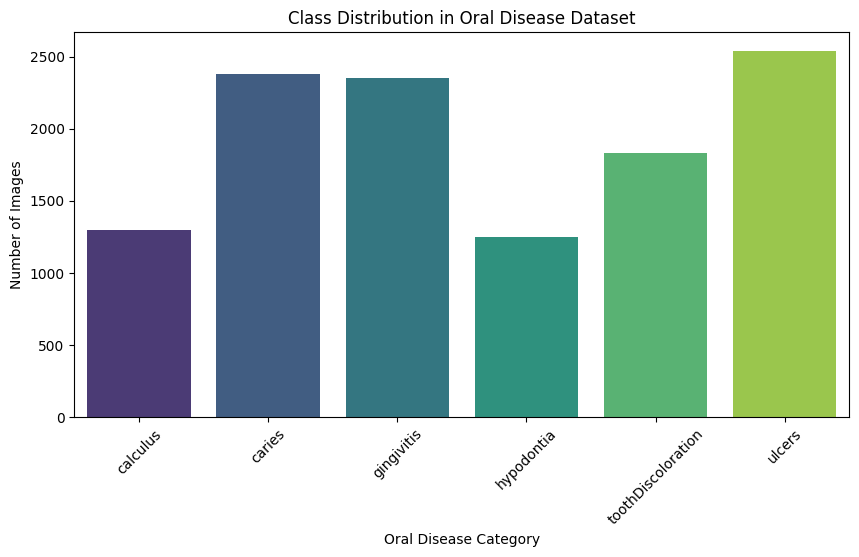

In [3]:
import os
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns


# Get class names (folder names)
class_names = sorted(os.listdir(data_dir))
print("Class Names:", class_names)

# Count images in each class
class_counts = {class_name: len(os.listdir(os.path.join(data_dir, class_name))) for class_name in class_names}

# Print dataset summary
print("Total Classes:", len(class_names))
print("Image Distribution:", class_counts)

# Plot the class distribution
plt.figure(figsize=(10, 5))
sns.barplot(x=list(class_counts.keys()), y=list(class_counts.values()),palette="viridis")
plt.xlabel("Oral Disease Category")
plt.ylabel("Number of Images")
plt.title("Class Distribution in Oral Disease Dataset")
plt.xticks(rotation=45)
plt.show()


# SPLIT THE DATA INTO TRAIN,VALIDATION AND TEST

In [4]:
import os
import shutil
import random

# Define paths
dataset_path = data_dir  # Your original dataset path
output_path = "/kaggle/working/oral_dataset_split"  # Use /kaggle/working/ to store the split data

# Define splits
train_ratio, val_ratio, test_ratio = 0.7, 0.15, 0.15

# Create train, val, test folders
for split in ['train', 'val', 'test']:
    split_path = os.path.join(output_path, split)
    os.makedirs(split_path, exist_ok=True)

    # Create class subfolders
    for class_name in os.listdir(dataset_path):
        os.makedirs(os.path.join(split_path, class_name), exist_ok=True)

# Split and copy images
for class_name in os.listdir(dataset_path):
    class_path = os.path.join(dataset_path, class_name)
    
    if not os.path.isdir(class_path):  # Skip non-folder files
        continue
    
    images = os.listdir(class_path)
    random.shuffle(images)  # Shuffle images for randomness

    # Split indices
    train_count = int(len(images) * train_ratio)
    val_count = int(len(images) * val_ratio)

    train_images = images[:train_count]
    val_images = images[train_count:train_count + val_count]
    test_images = images[train_count + val_count:]

    # Copy images to respective folders
    for img in train_images:
        shutil.copy(os.path.join(class_path, img), os.path.join(output_path, 'train', class_name, img))
    for img in val_images:
        shutil.copy(os.path.join(class_path, img), os.path.join(output_path, 'val', class_name, img))
    for img in test_images:
        shutil.copy(os.path.join(class_path, img), os.path.join(output_path, 'test', class_name, img))

print("Dataset successfully split into train, validation, and test sets!")


Dataset successfully split into train, validation, and test sets!


In [6]:
for split in ['train', 'val', 'test']:
    split_path = os.path.join(output_path, split)
    print(f"{split} set:")
    for class_name in os.listdir(split_path):
        print(f"  {class_name}: {len(os.listdir(os.path.join(split_path, class_name)))} images")


train set:
  hypodontia: 875 images
  caries: 1667 images
  calculus: 907 images
  ulcers: 1778 images
  gingivitis: 1644 images
  toothDiscoloration: 1283 images
val set:
  hypodontia: 187 images
  caries: 357 images
  calculus: 194 images
  ulcers: 381 images
  gingivitis: 352 images
  toothDiscoloration: 275 images
test set:
  hypodontia: 189 images
  caries: 358 images
  calculus: 195 images
  ulcers: 382 images
  gingivitis: 353 images
  toothDiscoloration: 276 images


# DATA AUGMENTATION

In [9]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Define paths
train_dir = "/kaggle/working/oral_dataset_split/train"
val_dir = "/kaggle/working/oral_dataset_split/val"
test_dir = "/kaggle/working/oral_dataset_split/test"

# Define ImageDataGenerator for training (with augmentation)
train_datagen = ImageDataGenerator(
    rescale=1.0/255,           # Normalize pixel values
    rotation_range=30,         # Rotate images randomly
    width_shift_range=0.2,     # Shift images horizontally
    height_shift_range=0.2,    # Shift images vertically
    zoom_range=0.2,            # Zoom in/out
    horizontal_flip=True,      # Flip horizontally
    fill_mode="nearest"        # Fill missing pixels
)

# For validation & testing, we only rescale (no augmentation)
val_test_datagen = ImageDataGenerator(rescale=1.0/255)

# Load images from directories
train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=(128, 128),    # Resize images to match input shape
    batch_size=32,
    class_mode="categorical"   # Since it's a multi-class problem
)

val_generator = val_test_datagen.flow_from_directory(
    val_dir,
    target_size=(128, 128),
    batch_size=32,
    class_mode="categorical"
)

test_generator = val_test_datagen.flow_from_directory(
    test_dir,
    target_size=(128, 128),
    batch_size=32,
    class_mode="categorical",
    shuffle=False  # Important for evaluation
)

print("Data augmentation applied successfully!")


Found 8154 images belonging to 6 classes.
Found 1746 images belonging to 6 classes.
Found 1753 images belonging to 6 classes.
Data augmentation applied successfully!


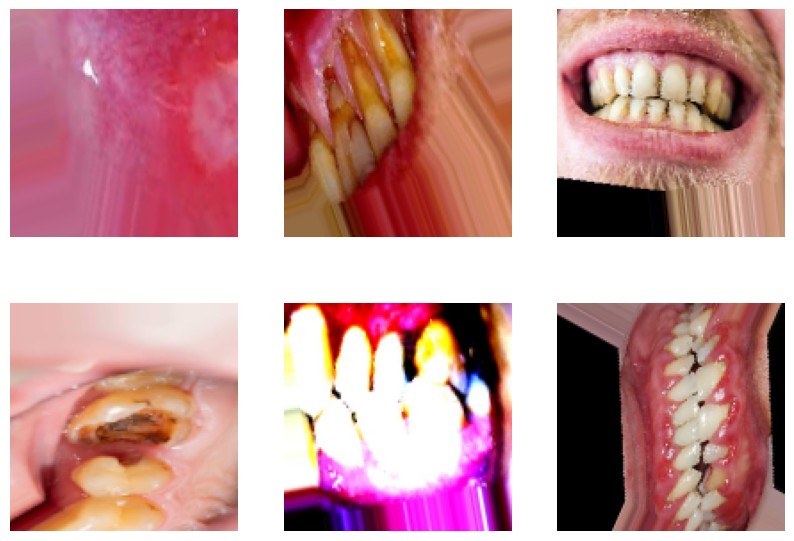

In [10]:
import matplotlib.pyplot as plt

# Get a batch of images
batch_images, batch_labels = next(train_generator)

# Plot 6 images
fig, axes = plt.subplots(2, 3, figsize=(10, 7))
for i, ax in enumerate(axes.flatten()):
    ax.imshow(batch_images[i])
    ax.axis("off")
plt.show()


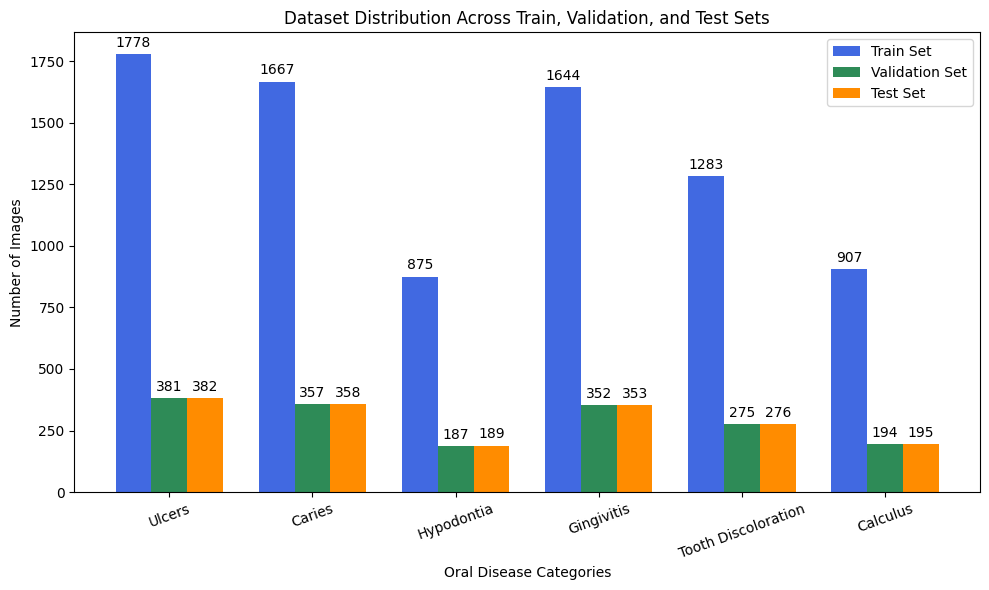

In [11]:
import matplotlib.pyplot as plt
import numpy as np

# Data
categories = ["Ulcers", "Caries", "Hypodontia", "Gingivitis", "Tooth Discoloration", "Calculus"]
train_counts = [1778, 1667, 875, 1644, 1283, 907]
val_counts = [381, 357, 187, 352, 275, 194]
test_counts = [382, 358, 189, 353, 276, 195]

x = np.arange(len(categories))  # the label locations
width = 0.25  # the width of the bars

fig, ax = plt.subplots(figsize=(10, 6))

# Plot bars
rects1 = ax.bar(x - width, train_counts, width, label="Train Set", color="royalblue")
rects2 = ax.bar(x, val_counts, width, label="Validation Set", color="seagreen")
rects3 = ax.bar(x + width, test_counts, width, label="Test Set", color="darkorange")

# Labels, title, and legend
ax.set_xlabel("Oral Disease Categories")
ax.set_ylabel("Number of Images")
ax.set_title("Dataset Distribution Across Train, Validation, and Test Sets")
ax.set_xticks(x)
ax.set_xticklabels(categories, rotation=20)
ax.legend()

# Show values on top of bars
for rects in [rects1, rects2, rects3]:
    for rect in rects:
        height = rect.get_height()
        ax.annotate(f"{height}",
                    xy=(rect.get_x() + rect.get_width() / 2, height),
                    xytext=(0, 3),  # 3 points vertical offset
                    textcoords="offset points",
                    ha='center', va='bottom', fontsize=10)

plt.tight_layout()
plt.show()


# EVALUATION METRICS

In [17]:
from tensorflow.keras import backend as K
def precision_m(y_true, y_pred):
    true_positives = K.sum(K.round(K.clip(y_true * y_pred, 0, 1)))
    predicted_positives = K.sum(K.round(K.clip(y_pred, 0, 1)))
    return true_positives / (predicted_positives + K.epsilon())

def recall_m(y_true, y_pred):
    true_positives = K.sum(K.round(K.clip(y_true * y_pred, 0, 1)))
    possible_positives = K.sum(K.round(K.clip(y_true, 0, 1)))
    return true_positives / (possible_positives + K.epsilon())

def f1_m(y_true, y_pred):
    precision = precision_m(y_true, y_pred)
    recall = recall_m(y_true, y_pred)
    return 2 * ((precision * recall) / (precision + recall + K.epsilon()))

In [15]:
from tensorflow.keras import backend as K

In [12]:
def f1_score(y_true, y_pred): #taken from old keras source code
    true_positives = K.sum(K.round(K.clip(y_true * y_pred, 0, 1)))
    possible_positives = K.sum(K.round(K.clip(y_true, 0, 1)))
    predicted_positives = K.sum(K.round(K.clip(y_pred, 0, 1)))
    precision = true_positives / (predicted_positives + K.epsilon())
    recall = true_positives / (possible_positives + K.epsilon())
    f1_val = 2*(precision*recall)/(precision+recall+K.epsilon())
    return f1_val

METRICS = [
      tf.keras.metrics.BinaryAccuracy(name='accuracy'),
      tf.keras.metrics.Precision(name='precision'),
      tf.keras.metrics.Recall(name='recall'),  
      tf.keras.metrics.AUC(name='auc'),
      f1_score,
]

I0000 00:00:1746705638.755540      31 gpu_device.cc:2022] Created device /job:localhost/replica:0/task:0/device:GPU:0 with 15513 MB memory:  -> device: 0, name: Tesla P100-PCIE-16GB, pci bus id: 0000:00:04.0, compute capability: 6.0


# 1. ResNet50

In [24]:
import tensorflow as tf
from tensorflow.keras.applications import ResNet50, ResNet101
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Dense, Flatten, Dropout, GlobalAveragePooling2D
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import ReduceLROnPlateau
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.callbacks import ModelCheckpoint


ADAM_LEARNING_RATE = 0.0001
PATIENCE =10

# Choose ResNet model
resnet_model = ResNet50(weights="imagenet", include_top=False, input_shape=(128, 128, 3))  # For ResNet101, replace with ResNet101

# Freeze all layers except the last few for fine-tuning
for layer in resnet_model.layers:
    layer.trainable = False  # Initially freeze the base model

# Add custom classification layers
x = resnet_model.output
x = GlobalAveragePooling2D()(x)  # Reduces dimensionality while keeping features
x = Dense(512, activation="relu")(x)
x = Dropout(0.5)(x)  # Reduces overfitting
x = Dense(len(class_names), activation="softmax")(x)  # Output layer (num_classes)

# Define final model
model = Model(inputs=resnet_model.input, outputs=x)

# Compile model
model.compile(optimizer=Adam(learning_rate=0.0001), loss="categorical_crossentropy", metrics=METRICS)

from collections import Counter
counter = Counter(train_generator.classes)                          
max_val = float(max(counter.values()))       
class_weights = {class_id : round(max_val/num_images,2) for class_id, num_images in counter.items()}  

lrd = ReduceLROnPlateau(monitor = 'val_loss',patience = PATIENCE,verbose = 1,factor = 0.50, min_lr = 1e-10)
mcp = ModelCheckpoint('model.keras')
es = EarlyStopping(verbose=1, patience=20)

history=model.fit(train_generator,
                  validation_data=val_generator,
                  epochs = 10,
                  verbose =1,
                  callbacks = [lrd,mcp,es], 
                  class_weight = class_weights)


# Print model summary
model.summary()


Epoch 1/10
255/255 ━━━━━━━━━━━━━━━━━━━━ 62s 186ms/step - accuracy: 0.8324 - auc: 0.5181 - f1_score: 0.0036 - loss: 2.4576 - precision: 0.2064 - recall: 0.0019 - val_accuracy: 0.8333 - val_auc: 0.6708 - val_f1_score: 0.0000e+00 - val_loss: 1.7266 - val_precision: 0.0000e+00 - val_recall: 0.0000e+00 - learning_rate: 1.0000e-04
Epoch 2/10
255/255 ━━━━━━━━━━━━━━━━━━━━ 39s 149ms/step - accuracy: 0.8333 - auc: 0.5640 - f1_score: 0.0015 - loss: 2.3382 - precision: 0.4083 - recall: 7.9499e-04 - val_accuracy: 0.8333 - val_auc: 0.6977 - val_f1_score: 0.0000e+00 - val_loss: 1.6855 - val_precision: 0.0000e+00 - val_recall: 0.0000e+00 - learning_rate: 1.0000e-04
Epoch 3/10
255/255 ━━━━━━━━━━━━━━━━━━━━ 39s 150ms/step - accuracy: 0.8333 - auc: 0.6291 - f1_score: 0.0016 - loss: 2.2352 - precision: 0.4118 - recall: 8.0596e-04 - val_accuracy: 0.8340 - val_auc: 0.6968 - val_f1_score: 0.0088 - val_loss: 1.6546 - val_precision: 0.8889 - val_recall: 0.0046 - learning_rate: 1.0000e-04
Epoch 4/10
255/255 ━━━━

Model: "functional_6"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)              ┃ Output Shape           ┃        Param # ┃ Connected to           ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━┩
│ input_layer_6             │ (None, 128, 128, 3)    │              0 │ -                      │
│ (InputLayer)              │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv1_pad (ZeroPadding2D) │ (None, 134, 134, 3)    │              0 │ input_layer_6[0][0]    │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv1_conv (Conv2D)       │ (None, 64, 64, 64)     │          9,472 │ conv1_pad[0][0]        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv1_bn                  │ (None, 64, 64, 64)     │            256 │ conv1_conv[0][0]       │
│ (BatchNormalization)      │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv1_relu (Activation)   │ (None, 64, 64, 64)     │              0 │ conv1_bn[0][0]         │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ pool1_pad (ZeroPadding2D) │ (None, 66, 66, 64)     │              0 │ conv1_relu[0][0]       │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ pool1_pool (MaxPooling2D) │ (None, 32, 32, 64)     │              0 │ pool1_pad[0][0]        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2_block1_1_conv       │ (None, 32, 32, 64)     │          4,160 │ pool1_pool[0][0]       │
│ (Conv2D)                  │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2_block1_1_bn         │ (None, 32, 32, 64)     │            256 │ conv2_block1_1_conv[0… │
│ (BatchNormalization)      │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2_block1_1_relu       │ (None, 32, 32, 64)     │              0 │ conv2_block1_1_bn[0][… │
│ (Activation)              │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2_block1_2_conv       │ (None, 32, 32, 64)     │         36,928 │ conv2_block1_1_relu[0… │
│ (Conv2D)                  │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2_block1_2_bn         │ (None, 32, 32, 64)     │            256 │ conv2_block1_2_conv[0… │
│ (BatchNormalization)      │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2_block1_2_relu       │ (None, 32, 32, 64)     │              0 │ conv2_block1_2_bn[0][… │
│ (Activation)              │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2_block1_0_conv       │ (None, 32, 32, 256)    │         16,640 │ pool1_pool[0][0]       │
│ (Conv2D)                  │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2_block1_3_conv       │ (None, 32, 32, 256)    │         16,640 │ conv2_block1_2_relu[0… │
│ (Conv2D)             

 Total params: 26,744,212 (102.02 MB)

 Trainable params: 1,052,166 (4.01 MB)

 Non-trainable params: 23,587,712 (89.98 MB)

 Optimizer params: 2,104,334 (8.03 MB)

In [25]:
# Save the model
model.save("resnet_50.h5")

In [26]:
res50=model.evaluate(test_generator)

55/55 ━━━━━━━━━━━━━━━━━━━━ 5s 87ms/step - accuracy: 0.8337 - auc: 0.7161 - f1_score: 0.0226 - loss: 1.5814 - precision: 0.4144 - recall: 0.0151


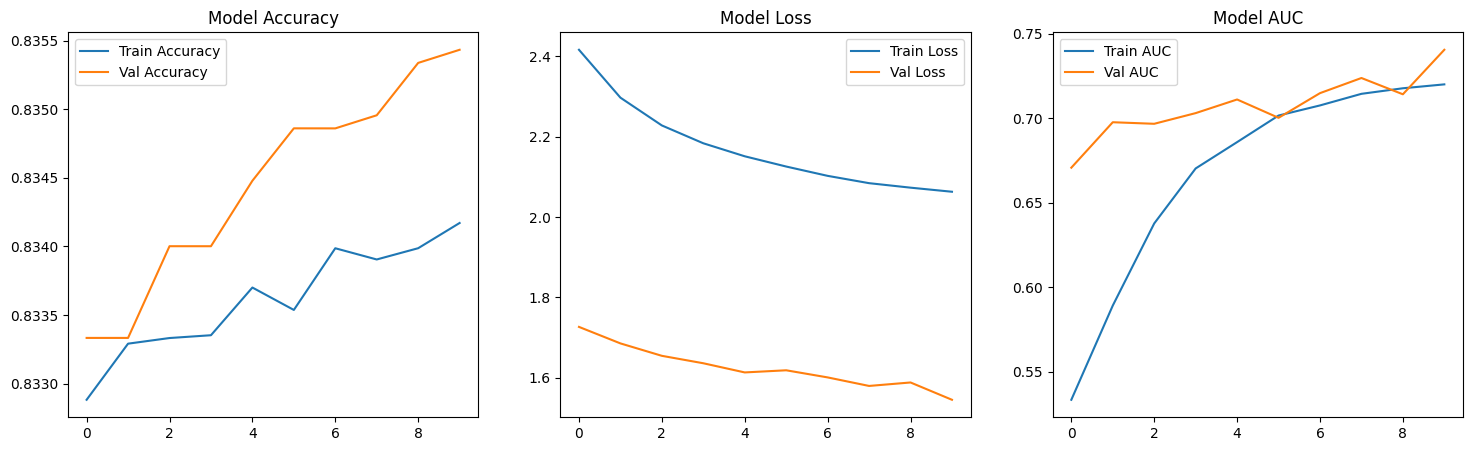

In [28]:
import matplotlib.pyplot as plt

def plot_graph(history): # Plot accuracy & loss
    plt.figure(figsize=(18, 5))
    
    # Accuracy Plot
    plt.subplot(1, 3, 1)
    plt.plot(history.history['accuracy'], label='Train Accuracy')
    plt.plot(history.history['val_accuracy'], label='Val Accuracy')
    plt.legend()
    plt.title("Model Accuracy")
    plt.xlabel('Accuracy')
    plt.ylabel('Epochs')
    
    # Loss Plot
    plt.subplot(1, 3, 2)
    plt.plot(history.history['loss'], label='Train Loss')
    plt.plot(history.history['val_loss'], label='Val Loss')
    plt.legend()
    plt.title("Model Loss")
    plt.xlabel('Loss')
    plt.ylabel('Epochs')
    
    # Loss Plot
    plt.subplot(1, 3, 3)
    plt.plot(history.history['auc'], label='Train AUC')
    plt.plot(history.history['val_auc'], label='Val AUC')
    plt.legend()
    plt.title("Model AUC")
    plt.xlabel('AUC')
    plt.ylabel('Epochs')
    
    plt.show()

plot_graph(history)

# 2. Restnet101

In [29]:
from tensorflow.keras.applications import ResNet101

resnet_model = ResNet101(weights="imagenet", include_top=False, input_shape=(128, 128, 3))


171446536/171446536 ━━━━━━━━━━━━━━━━━━━━ 1s 0us/step


In [30]:
for layer in resnet_model.layers[-10:]:  
    layer.trainable = True  # Fine-tune only last 10 layers


In [31]:
from tensorflow.keras.layers import Flatten, Dense, Dropout
from tensorflow.keras.models import Model

x = Flatten()(resnet_model.output)
x = Dense(512, activation='relu')(x)
x = Dropout(0.5)(x)  # Dropout to prevent overfitting
x = Dense(256, activation='relu')(x)
x = Dropout(0.3)(x)
output = Dense(len(class_names), activation='softmax')(x)

model = Model(inputs=resnet_model.input, outputs=output)

In [33]:
from tensorflow.keras.optimizers import Adam

model.compile(optimizer=Adam(learning_rate=1e-4),  # Lower learning rate
              loss='categorical_crossentropy',
              metrics=METRICS)

from collections import Counter
counter = Counter(train_generator.classes)                          
max_val = float(max(counter.values()))       
class_weights = {class_id : round(max_val/num_images,2) for class_id, num_images in counter.items()}  

lrd = ReduceLROnPlateau(monitor = 'val_loss',patience = PATIENCE,verbose = 1,factor = 0.50, min_lr = 1e-10)
mcp = ModelCheckpoint('model.keras')
es = EarlyStopping(verbose=1, patience=20)

history=model.fit(train_generator,
                  validation_data=val_generator,
                  epochs = 50,
                  verbose =1,
                  callbacks = [lrd,mcp,es], 
                  class_weight = class_weights)


Epoch 1/50
255/255 ━━━━━━━━━━━━━━━━━━━━ 217s 348ms/step - accuracy: 0.8348 - auc: 0.7619 - f1_score: 0.3993 - loss: 2.4801 - precision: 0.4867 - recall: 0.2437 - val_accuracy: 0.7693 - val_auc: 0.5652 - val_f1_score: 0.1790 - val_loss: 2.3236 - val_precision: 0.2216 - val_recall: 0.1529 - learning_rate: 1.0000e-04
Epoch 2/50
255/255 ━━━━━━━━━━━━━━━━━━━━ 45s 174ms/step - accuracy: 0.9079 - auc: 0.9444 - f1_score: 0.6995 - loss: 0.9873 - precision: 0.7644 - recall: 0.6466 - val_accuracy: 0.7574 - val_auc: 0.5508 - val_f1_score: 0.2064 - val_loss: 2.9079 - val_precision: 0.2279 - val_recall: 0.1907 - learning_rate: 1.0000e-04
Epoch 3/50
255/255 ━━━━━━━━━━━━━━━━━━━━ 45s 171ms/step - accuracy: 0.9317 - auc: 0.9688 - f1_score: 0.7834 - loss: 0.7293 - precision: 0.8274 - recall: 0.7456 - val_accuracy: 0.8292 - val_auc: 0.7390 - val_f1_score: 0.4225 - val_loss: 6.6505 - val_precision: 0.4841 - val_recall: 0.3751 - learning_rate: 1.0000e-04
Epoch 4/50
255/255 ━━━━━━━━━━━━━━━━━━━━ 46s 174ms/step

In [34]:
model.summary()

Model: "functional_7"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)              ┃ Output Shape           ┃        Param # ┃ Connected to           ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━┩
│ input_layer_7             │ (None, 128, 128, 3)    │              0 │ -                      │
│ (InputLayer)              │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv1_pad (ZeroPadding2D) │ (None, 134, 134, 3)    │              0 │ input_layer_7[0][0]    │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv1_conv (Conv2D)       │ (None, 64, 64, 64)     │          9,472 │ conv1_pad[0][0]        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv1_bn                  │ (None, 64, 64, 64)     │            256 │ conv1_conv[0][0]       │
│ (BatchNormalization)      │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv1_relu (Activation)   │ (None, 64, 64, 64)     │              0 │ conv1_bn[0][0]         │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ pool1_pad (ZeroPadding2D) │ (None, 66, 66, 64)     │              0 │ conv1_relu[0][0]       │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ pool1_pool (MaxPooling2D) │ (None, 32, 32, 64)     │              0 │ pool1_pad[0][0]        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2_block1_1_conv       │ (None, 32, 32, 64)     │          4,160 │ pool1_pool[0][0]       │
│ (Conv2D)                  │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2_block1_1_bn         │ (None, 32, 32, 64)     │            256 │ conv2_block1_1_conv[0… │
│ (BatchNormalization)      │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2_block1_1_relu       │ (None, 32, 32, 64)     │              0 │ conv2_block1_1_bn[0][… │
│ (Activation)              │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2_block1_2_conv       │ (None, 32, 32, 64)     │         36,928 │ conv2_block1_1_relu[0… │
│ (Conv2D)                  │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2_block1_2_bn         │ (None, 32, 32, 64)     │            256 │ conv2_block1_2_conv[0… │
│ (BatchNormalization)      │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2_block1_2_relu       │ (None, 32, 32, 64)     │              0 │ conv2_block1_2_bn[0][… │
│ (Activation)              │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2_block1_0_conv       │ (None, 32, 32, 256)    │         16,640 │ pool1_pool[0][0]       │
│ (Conv2D)                  │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2_block1_3_conv       │ (None, 32, 32, 256)    │         16,640 │ conv2_block1_2_relu[0… │
│ (Conv2D)             

 Total params: 178,495,636 (680.91 MB)

 Trainable params: 59,463,430 (226.83 MB)

 Non-trainable params: 105,344 (411.50 KB)

 Optimizer params: 118,926,862 (453.67 MB)

In [35]:
model.save("/kaggle/working/resnet100.h5")

In [36]:
res101=model.evaluate(test_generator)

55/55 ━━━━━━━━━━━━━━━━━━━━ 6s 111ms/step - accuracy: 0.9671 - auc: 0.9890 - f1_score: 0.9012 - loss: 0.2954 - precision: 0.9032 - recall: 0.8990


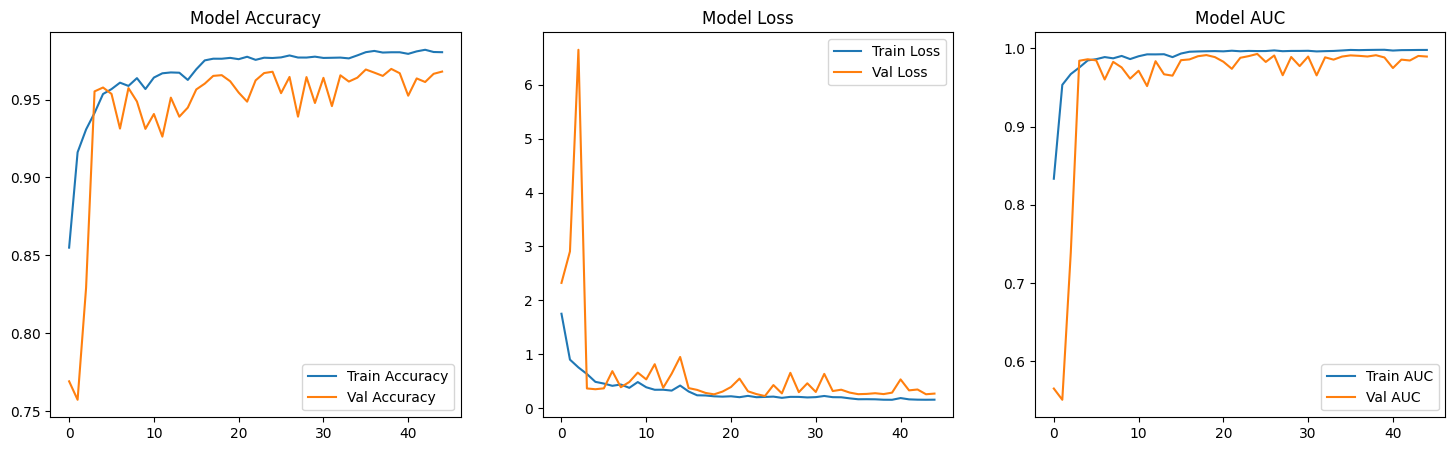

In [39]:
plot_graph(history)

# 3. VGG19

In [41]:
from tensorflow.keras.applications import VGG19
from tensorflow.keras.layers import Flatten, Dense, Dropout
from tensorflow.keras.models import Model

# Load Pretrained VGG19
vgg_model = VGG19(weights="imagenet", include_top=False, input_shape=(128, 128, 3))

# Freeze Initial Layers
for layer in vgg_model.layers[:-5]:  # Fine-tune only last 5 layers
    layer.trainable = False


80134624/80134624 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


In [42]:
x = Flatten()(vgg_model.output)
x = Dense(512, activation='relu')(x)
x = Dropout(0.5)(x)  # Dropout to prevent overfitting
x = Dense(256, activation='relu')(x)
x = Dropout(0.3)(x)
output = Dense(6, activation='softmax')(x)

model = Model(inputs=vgg_model.input, outputs=output)


In [43]:
from tensorflow.keras.optimizers import Adam

model.compile(optimizer=Adam(learning_rate=1e-4),  
              loss='categorical_crossentropy',
              metrics=METRICS)

from collections import Counter
counter = Counter(train_generator.classes)                          
max_val = float(max(counter.values()))       
class_weights = {class_id : round(max_val/num_images,2) for class_id, num_images in counter.items()}  

lrd = ReduceLROnPlateau(monitor = 'val_loss',patience = PATIENCE,verbose = 1,factor = 0.50, min_lr = 1e-10)
mcp = ModelCheckpoint('model.keras')
es = EarlyStopping(verbose=1, patience=20)

history=model.fit(train_generator,
                  validation_data=val_generator,
                  epochs = 50,
                  verbose =1,
                  callbacks = [lrd,mcp,es], 
                  class_weight = class_weights)


Epoch 1/50
255/255 ━━━━━━━━━━━━━━━━━━━━ 57s 185ms/step - accuracy: 0.8874 - auc: 0.8768 - f1_score: 0.1509 - loss: 2.0818 - precision: 0.8065 - recall: 0.4175 - val_accuracy: 0.8778 - val_auc: 0.9141 - val_f1_score: 0.5261 - val_loss: 0.9277 - val_precision: 0.7407 - val_recall: 0.4107 - learning_rate: 1.0000e-04
Epoch 2/50
255/255 ━━━━━━━━━━━━━━━━━━━━ 39s 149ms/step - accuracy: 0.8775 - auc: 0.9112 - f1_score: 0.5598 - loss: 1.2105 - precision: 0.6948 - recall: 0.4718 - val_accuracy: 0.8997 - val_auc: 0.9258 - val_f1_score: 0.6711 - val_loss: 0.8760 - val_precision: 0.7375 - val_recall: 0.6180 - learning_rate: 1.0000e-04
Epoch 3/50
255/255 ━━━━━━━━━━━━━━━━━━━━ 39s 151ms/step - accuracy: 0.9042 - auc: 0.9437 - f1_score: 0.6822 - loss: 0.9649 - precision: 0.7597 - recall: 0.6219 - val_accuracy: 0.9228 - val_auc: 0.9609 - val_f1_score: 0.7548 - val_loss: 0.6124 - val_precision: 0.8005 - val_recall: 0.7148 - learning_rate: 1.0000e-04
Epoch 4/50
255/255 ━━━━━━━━━━━━━━━━━━━━ 39s 151ms/step 

In [44]:
model.summary()

Model: "functional_8"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ input_layer_8 (InputLayer)           │ (None, 128, 128, 3)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block1_conv1 (Conv2D)                │ (None, 128, 128, 64)        │           1,792 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block1_conv2 (Conv2D)                │ (None, 128, 128, 64)        │          36,928 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block1_pool (MaxPooling2D)           │ (None, 64, 64, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block2_conv1 (Conv2D)                │ (None, 64, 64, 128)         │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block2_conv2 (Conv2D)                │ (None, 64, 64, 128)         │         147,584 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block2_pool (MaxPooling2D)           │ (None, 32, 32, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block3_conv1 (Conv2D)                │ (None, 32, 32, 256)         │         295,168 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block3_conv2 (Conv2D)                │ (None, 32, 32, 256)         │         590,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block3_conv3 (Conv2D)                │ (None, 32, 32, 256)         │         590,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block3_conv4 (Conv2D)                │ (None, 32, 32, 256)         │         590,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block3_pool (MaxPooling2D)           │ (None, 16, 16, 256)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block4_conv1 (Conv2D)                │ (None, 16, 16, 512)         │       1,180,160 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block4_conv2 (Conv2D)                │ (None, 16, 16, 512)         │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block4_conv3 (Conv2D)                │ (None, 16, 16, 512)         │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block4_conv4 (Conv2D)                │ (None, 16, 16, 512)         │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block4_pool (MaxPooling2D)           │ (None, 8, 8, 512)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block5_conv1 (Conv2D)                │ (None, 8, 8, 512)           │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block5_conv2 (Conv2D)                │ (None, 8, 8, 512)           │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block5_conv3 (Conv2D)                │ (None, 8, 8, 512)           │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block5_conv4 (Conv2D)                │ (None, 8, 8, 512)           │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼──────────────

 Total params: 51,885,908 (197.93 MB)

 Trainable params: 13,766,918 (52.52 MB)

 Non-trainable params: 10,585,152 (40.38 MB)

 Optimizer params: 27,533,838 (105.03 MB)

In [45]:
model.save("/kaggle/working/vgg19.h5")

In [46]:
vgg19=model.evaluate(test_generator)

55/55 ━━━━━━━━━━━━━━━━━━━━ 5s 96ms/step - accuracy: 0.9614 - auc: 0.9839 - f1_score: 0.8841 - loss: 0.3746 - precision: 0.8853 - recall: 0.8830


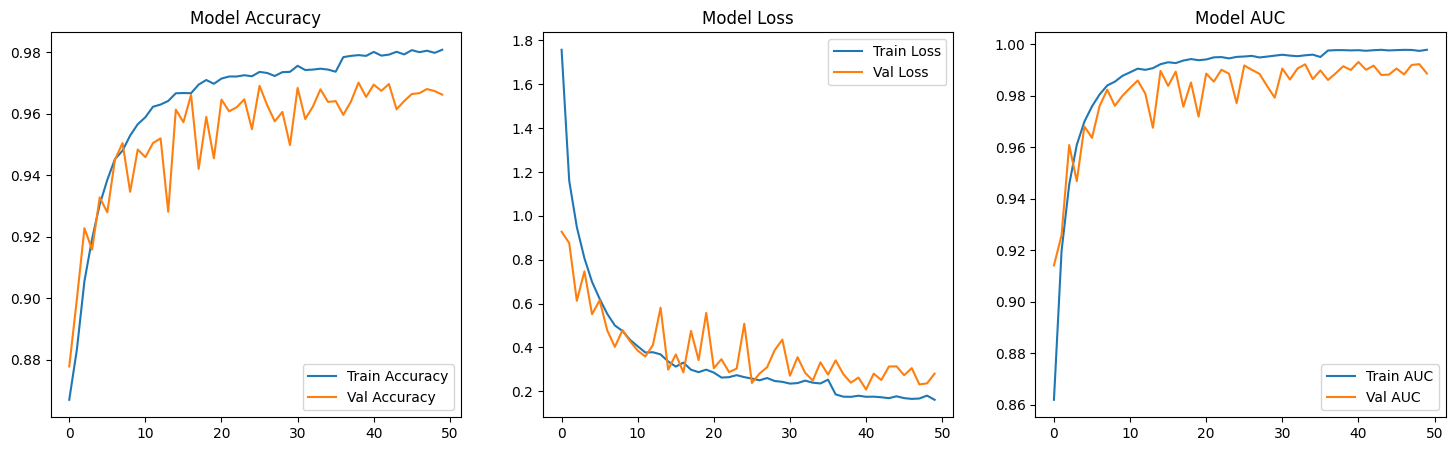

In [47]:
plot_graph(history)


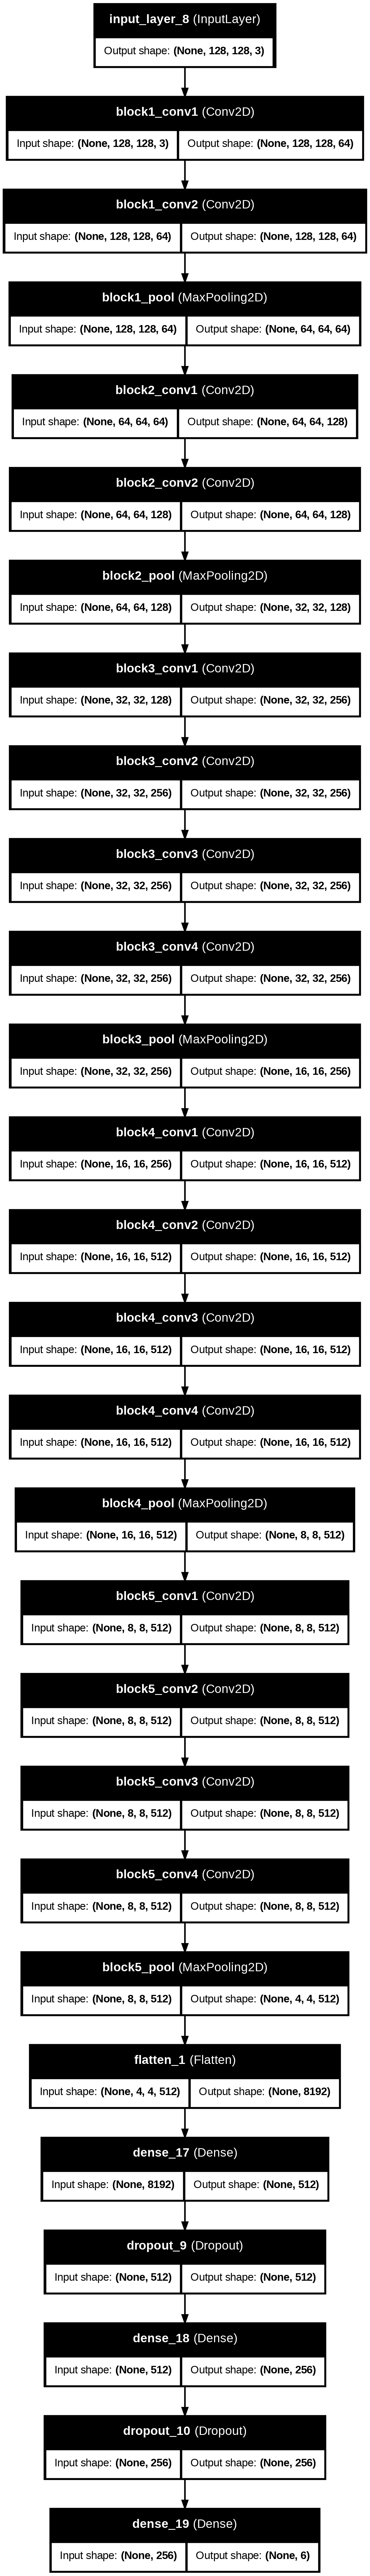

In [48]:
plot_model(model, to_file='VGG19_architecture.png', show_shapes=True, show_layer_names=True)

# 4.Inception V3

In [50]:
from tensorflow.keras.applications import InceptionV3
from tensorflow.keras import layers, models

# Load InceptionV3 model with ImageNet weights (without top layers)
base_model = InceptionV3(weights="imagenet", include_top=False, input_shape=(128, 128, 3))

# Freeze the layers of the base model
base_model.trainable = False

# Create the model
model = models.Sequential([
    base_model,
    layers.GlobalAveragePooling2D(),
    layers.Dense(1024, activation='relu'),
    layers.Dropout(0.5),
    layers.Dense(6, activation='softmax')
])



In [51]:
model.compile(optimizer=Adam(learning_rate=1e-4),  
              loss='categorical_crossentropy',
              metrics=METRICS)

from collections import Counter
counter = Counter(train_generator.classes)                          
max_val = float(max(counter.values()))       
class_weights = {class_id : round(max_val/num_images,2) for class_id, num_images in counter.items()}  

lrd = ReduceLROnPlateau(monitor = 'val_loss',patience = PATIENCE,verbose = 1,factor = 0.50, min_lr = 1e-10)
mcp = ModelCheckpoint('model.keras')
es = EarlyStopping(verbose=1, patience=20)

history=model.fit(train_generator,
                  validation_data=val_generator,
                  epochs = 50,
                  verbose =1,
                  callbacks = [lrd,mcp,es], 
                  class_weight = class_weights)


Epoch 1/50
255/255 ━━━━━━━━━━━━━━━━━━━━ 77s 224ms/step - accuracy: 0.8677 - auc: 0.8510 - f1_score: 0.3161 - loss: 3.2123 - precision: 0.6181 - recall: 0.5199 - val_accuracy: 0.8579 - val_auc: 0.8495 - val_f1_score: 0.4464 - val_loss: 1.2132 - val_precision: 0.6337 - val_recall: 0.3488 - learning_rate: 1.0000e-04
Epoch 2/50
255/255 ━━━━━━━━━━━━━━━━━━━━ 39s 149ms/step - accuracy: 0.8480 - auc: 0.8198 - f1_score: 0.4198 - loss: 1.7652 - precision: 0.5764 - recall: 0.3322 - val_accuracy: 0.8692 - val_auc: 0.8742 - val_f1_score: 0.5064 - val_loss: 1.1109 - val_precision: 0.6797 - val_recall: 0.4072 - learning_rate: 1.0000e-04
Epoch 3/50
255/255 ━━━━━━━━━━━━━━━━━━━━ 39s 149ms/step - accuracy: 0.8605 - auc: 0.8581 - f1_score: 0.4669 - loss: 1.5513 - precision: 0.6410 - recall: 0.3706 - val_accuracy: 0.8784 - val_auc: 0.8953 - val_f1_score: 0.5272 - val_loss: 1.0191 - val_precision: 0.7408 - val_recall: 0.4158 - learning_rate: 1.0000e-04
Epoch 4/50
255/255 ━━━━━━━━━━━━━━━━━━━━ 39s 147ms/step 

In [52]:
model.save("/kaggle/working/InceptionV3.h5")

In [53]:
model.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ inception_v3 (Functional)            │ (None, 2, 2, 2048)          │      21,802,784 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ global_average_pooling2d_8           │ (None, 2048)                │               0 │
│ (GlobalAveragePooling2D)             │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_22 (Dense)                     │ (None, 1024)                │       2,098,176 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_12 (Dropout)                 │ (None, 1024)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_23 (Dense)                     │ (None, 6)                   │           6,150 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 28,115,764 (107.25 MB)

 Trainable params: 2,104,326 (8.03 MB)

 Non-trainable params: 21,802,784 (83.17 MB)

 Optimizer params: 4,208,654 (16.05 MB)

In [54]:
InceptionV3=model.evaluate(test_generator)

55/55 ━━━━━━━━━━━━━━━━━━━━ 7s 127ms/step - accuracy: 0.9106 - auc: 0.9549 - f1_score: 0.7060 - loss: 0.6573 - precision: 0.7783 - recall: 0.6485


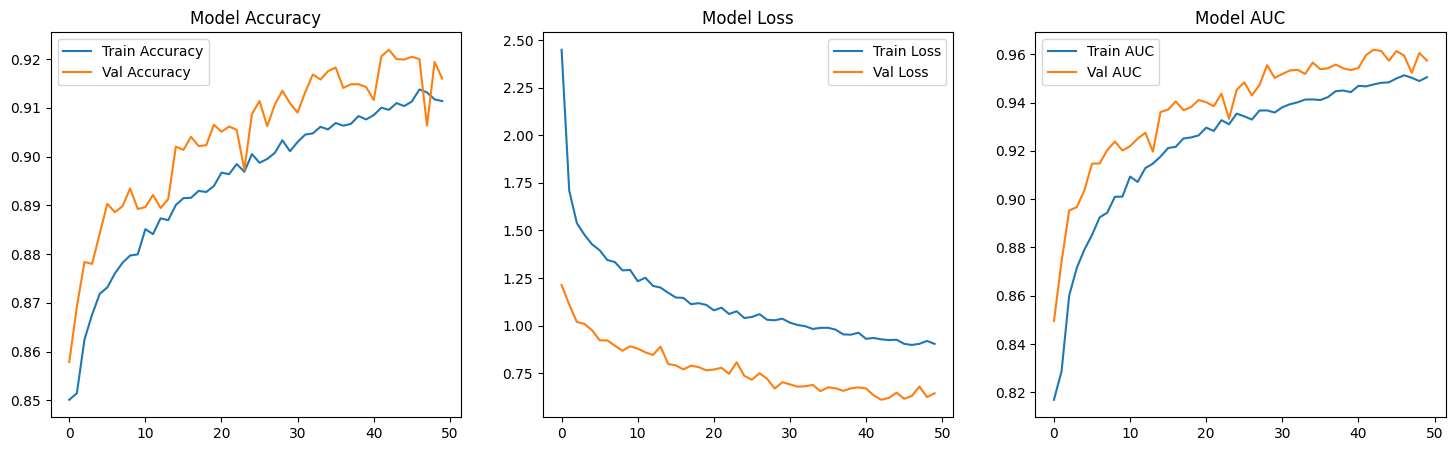

In [55]:
plot_graph(history)

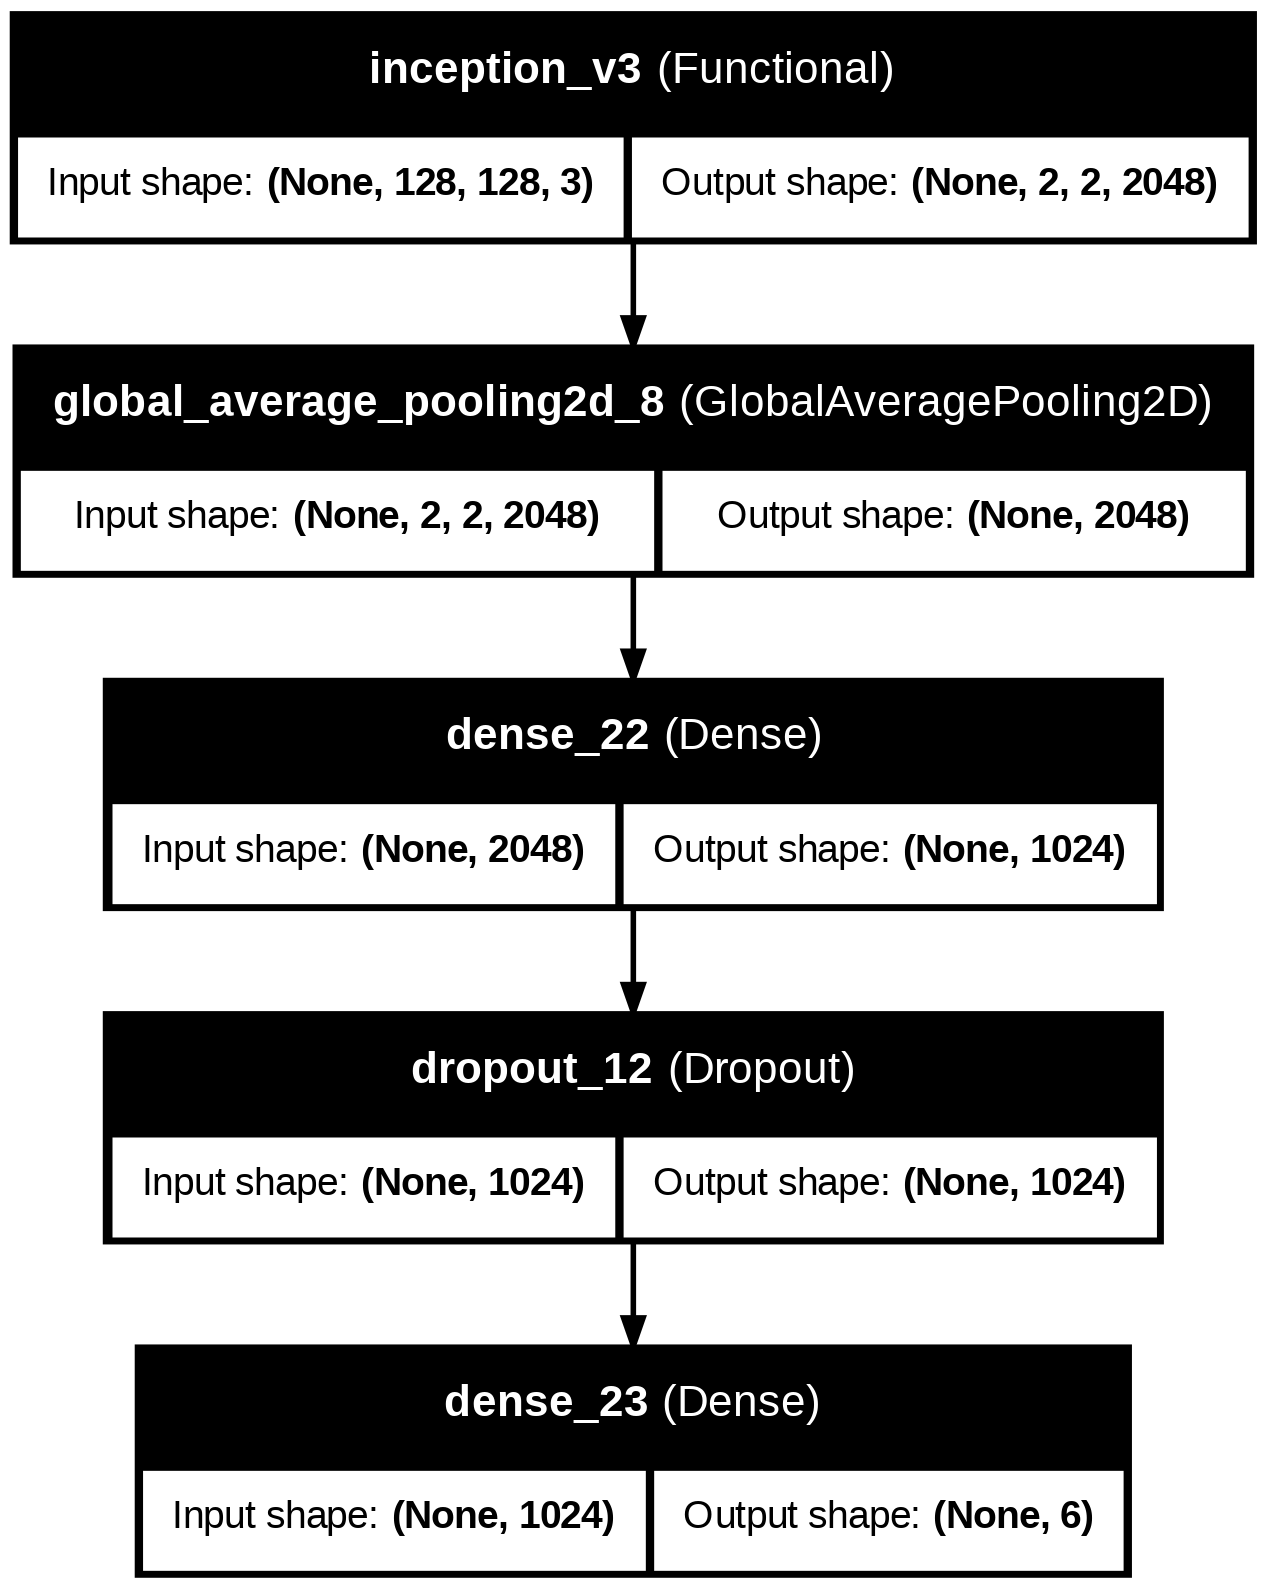

In [56]:
plot_model(model, to_file='Inceptionv3.png', show_shapes=True, show_layer_names=True)

# 5.EfficientNetB3

In [45]:
from tensorflow.keras.applications import EfficientNetB3
from tensorflow.keras import layers, models

# Load EfficientNetB3 with pre-trained ImageNet weights
base_model = EfficientNetB3(weights="imagenet", include_top=False, input_shape=(128, 128, 3))

# Freeze the base model layers
base_model.trainable = False

# Define the model architecture
model = models.Sequential([
    base_model,
    layers.GlobalAveragePooling2D(),
    layers.Dense(1024, activation='relu'),
    layers.Dropout(0.5),
    layers.Dense(6, activation='softmax')
])

# Compile the model
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy',precision_m, recall_m, f1_m])

# Summary of the model
model.summary()


43941136/43941136 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ efficientnetb3 (Functional)          │ (None, 4, 4, 1536)          │      10,783,535 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ global_average_pooling2d_3           │ (None, 1536)                │               0 │
│ (GlobalAveragePooling2D)             │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_12 (Dense)                     │ (None, 1024)                │       1,573,888 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_7 (Dropout)                  │ (None, 1024)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_13 (Dense)                     │ (None, 6)                   │           6,150 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 12,363,573 (47.16 MB)

 Trainable params: 1,580,038 (6.03 MB)

 Non-trainable params: 10,783,535 (41.14 MB)

In [46]:
history = model.fit(train_generator, epochs=50, validation_data=val_generator)


Epoch 1/50
255/255 ━━━━━━━━━━━━━━━━━━━━ 105s 286ms/step - accuracy: 0.2140 - f1_m: 0.0126 - loss: 1.8317 - precision_m: 0.0504 - recall_m: 0.0092 - val_accuracy: 0.2182 - val_f1_m: 0.0000e+00 - val_loss: 1.7547 - val_precision_m: 0.0000e+00 - val_recall_m: 0.0000e+00
Epoch 2/50
255/255 ━━━━━━━━━━━━━━━━━━━━ 46s 174ms/step - accuracy: 0.2244 - f1_m: 0.0000e+00 - loss: 1.7581 - precision_m: 0.0000e+00 - recall_m: 0.0000e+00 - val_accuracy: 0.2457 - val_f1_m: 0.0000e+00 - val_loss: 1.7588 - val_precision_m: 0.0000e+00 - val_recall_m: 0.0000e+00
Epoch 3/50
255/255 ━━━━━━━━━━━━━━━━━━━━ 46s 178ms/step - accuracy: 0.2034 - f1_m: 0.0000e+00 - loss: 1.7596 - precision_m: 0.0000e+00 - recall_m: 0.0000e+00 - val_accuracy: 0.2182 - val_f1_m: 0.0000e+00 - val_loss: 1.7530 - val_precision_m: 0.0000e+00 - val_recall_m: 0.0000e+00
Epoch 4/50
255/255 ━━━━━━━━━━━━━━━━━━━━ 47s 178ms/step - accuracy: 0.2109 - f1_m: 0.0000e+00 - loss: 1.7657 - precision_m: 0.0000e+00 - recall_m: 0.0000e+00 - val_accuracy: 0

In [47]:
model.save("/kaggle/working/EfficientNetB3.h5")

In [48]:
EffNetB3=model.evaluate(test_generator)

55/55 ━━━━━━━━━━━━━━━━━━━━ 11s 201ms/step - accuracy: 0.1512 - f1_m: 0.0000e+00 - loss: 1.8174 - precision_m: 0.0000e+00 - recall_m: 0.0000e+00


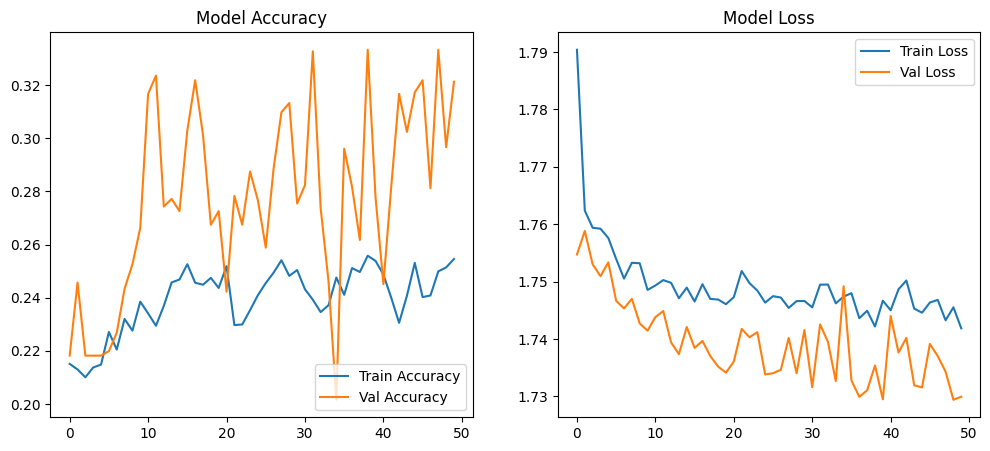

In [49]:
import matplotlib.pyplot as plt

# Plot accuracy & loss
plt.figure(figsize=(12, 5))

# Accuracy Plot
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Val Accuracy')
plt.legend()
plt.title("Model Accuracy")

# Loss Plot
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Val Loss')
plt.legend()
plt.title("Model Loss")

plt.show()


# 6. DenseNet121

In [57]:
import tensorflow as tf
from tensorflow.keras.applications import DenseNet121
from tensorflow.keras.layers import GlobalAveragePooling2D, Dense, Dropout
from tensorflow.keras.models import Model

# Load DenseNet121 (without top layers)
base_model = DenseNet121(weights="imagenet", include_top=False, input_shape=(128, 128, 3))  
base_model.trainable = False  # Freeze base model

# Add custom classification layers
x = GlobalAveragePooling2D()(base_model.output)
x = Dense(256, activation="relu")(x)
x = Dropout(0.5)(x)
output_layer = Dense(6, activation="softmax")(x)

# Create model
model = Model(inputs=base_model.input, outputs=output_layer)



29084464/29084464 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


In [58]:
model.compile(optimizer=Adam(learning_rate=1e-4),  
              loss='categorical_crossentropy',
              metrics=METRICS)

from collections import Counter
counter = Counter(train_generator.classes)                          
max_val = float(max(counter.values()))       
class_weights = {class_id : round(max_val/num_images,2) for class_id, num_images in counter.items()}  

lrd = ReduceLROnPlateau(monitor = 'val_loss',patience = PATIENCE,verbose = 1,factor = 0.50, min_lr = 1e-10)
mcp = ModelCheckpoint('model.keras')
es = EarlyStopping(verbose=1, patience=20)

history=model.fit(train_generator,
                  validation_data=val_generator,
                  epochs = 50,
                  verbose =1,
                  callbacks = [lrd,mcp,es], 
                  class_weight = class_weights)


Epoch 1/50
255/255 ━━━━━━━━━━━━━━━━━━━━ 101s 276ms/step - accuracy: 0.8447 - auc: 0.7725 - f1_score: 0.2175 - loss: 3.1888 - precision: 0.5443 - recall: 0.3673 - val_accuracy: 0.8649 - val_auc: 0.8688 - val_f1_score: 0.4209 - val_loss: 1.1584 - val_precision: 0.7321 - val_recall: 0.2990 - learning_rate: 1.0000e-04
Epoch 2/50
255/255 ━━━━━━━━━━━━━━━━━━━━ 40s 151ms/step - accuracy: 0.8532 - auc: 0.8218 - f1_score: 0.4010 - loss: 1.7205 - precision: 0.6244 - recall: 0.2988 - val_accuracy: 0.8746 - val_auc: 0.9003 - val_f1_score: 0.4866 - val_loss: 1.0270 - val_precision: 0.7609 - val_recall: 0.3608 - learning_rate: 1.0000e-04
Epoch 3/50
255/255 ━━━━━━━━━━━━━━━━━━━━ 39s 151ms/step - accuracy: 0.8640 - auc: 0.8622 - f1_score: 0.4667 - loss: 1.5279 - precision: 0.6702 - recall: 0.3613 - val_accuracy: 0.8869 - val_auc: 0.9198 - val_f1_score: 0.5665 - val_loss: 0.9170 - val_precision: 0.7769 - val_recall: 0.4507 - learning_rate: 1.0000e-04
Epoch 4/50
255/255 ━━━━━━━━━━━━━━━━━━━━ 39s 150ms/step

In [59]:
model.summary()

Model: "functional_11"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)              ┃ Output Shape           ┃        Param # ┃ Connected to           ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━┩
│ input_layer_13            │ (None, 128, 128, 3)    │              0 │ -                      │
│ (InputLayer)              │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ zero_padding2d            │ (None, 134, 134, 3)    │              0 │ input_layer_13[0][0]   │
│ (ZeroPadding2D)           │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv1_conv (Conv2D)       │ (None, 64, 64, 64)     │          9,408 │ zero_padding2d[0][0]   │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv1_bn                  │ (None, 64, 64, 64)     │            256 │ conv1_conv[0][0]       │
│ (BatchNormalization)      │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv1_relu (Activation)   │ (None, 64, 64, 64)     │              0 │ conv1_bn[0][0]         │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ zero_padding2d_1          │ (None, 66, 66, 64)     │              0 │ conv1_relu[0][0]       │
│ (ZeroPadding2D)           │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ pool1 (MaxPooling2D)      │ (None, 32, 32, 64)     │              0 │ zero_padding2d_1[0][0] │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2_block1_0_bn         │ (None, 32, 32, 64)     │            256 │ pool1[0][0]            │
│ (BatchNormalization)      │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2_block1_0_relu       │ (None, 32, 32, 64)     │              0 │ conv2_block1_0_bn[0][… │
│ (Activation)              │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2_block1_1_conv       │ (None, 32, 32, 128)    │          8,192 │ conv2_block1_0_relu[0… │
│ (Conv2D)                  │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2_block1_1_bn         │ (None, 32, 32, 128)    │            512 │ conv2_block1_1_conv[0… │
│ (BatchNormalization)      │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2_block1_1_relu       │ (None, 32, 32, 128)    │              0 │ conv2_block1_1_bn[0][… │
│ (Activation)              │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2_block1_2_conv       │ (None, 32, 32, 32)     │         36,864 │ conv2_block1_1_relu[0… │
│ (Conv2D)                  │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2_block1_concat       │ (None, 32, 32, 96)     │              0 │ pool1[0][0],           │
│ (Concatenate)             │                        │                │ conv2_block1_2_conv[0… │
├──────────────────────

 Total params: 7,829,332 (29.87 MB)

 Trainable params: 263,942 (1.01 MB)

 Non-trainable params: 7,037,504 (26.85 MB)

 Optimizer params: 527,886 (2.01 MB)

In [60]:
model.save("/kaggle/working/DenseNet.h5")

In [61]:
DenseNet=model.evaluate(test_generator)

55/55 ━━━━━━━━━━━━━━━━━━━━ 11s 204ms/step - accuracy: 0.9266 - auc: 0.9668 - f1_score: 0.7716 - loss: 0.5472 - precision: 0.8005 - recall: 0.7460


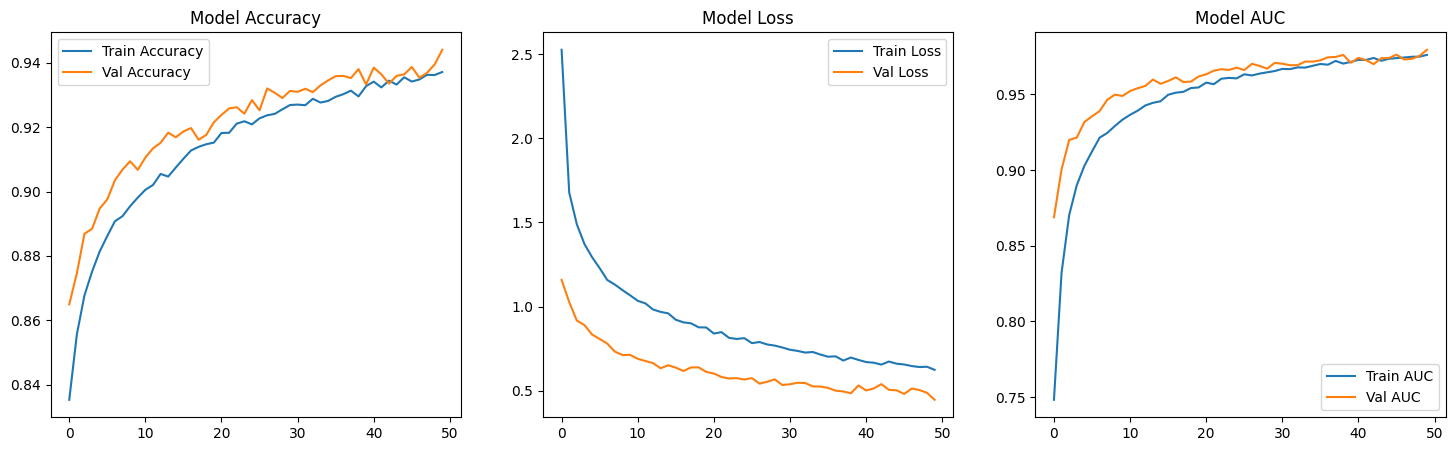

In [62]:
plot_graph(history)

dot: graph is too large for cairo-renderer bitmaps. Scaling by 0.2282 to fit



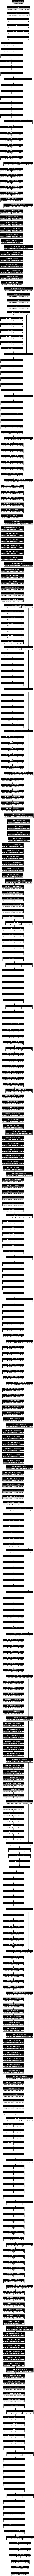

In [63]:
plot_model(model, to_file='densenet121.png', show_shapes=True, show_layer_names=True)

# ****6. VGG19 hypertune****

In [16]:
from tensorflow.keras.applications import VGG19
from tensorflow.keras.layers import Flatten, Dense, Dropout
from tensorflow.keras.models import Model
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.metrics import Precision, Recall
from tensorflow.keras.optimizers import SGD



# Load Pretrained VGG19
vgg_model = VGG19(weights="imagenet", include_top=False, input_shape=(128, 128, 3))

# Freeze all but last 5 layers
for layer in vgg_model.layers[:-5]:  
    layer.trainable = False

x = Flatten()(vgg_model.output)
x = Dense(512, activation='relu', kernel_regularizer='l2')(x)  # Added L2 regularization
x = Dropout(0.4)(x)  
x = Dense(256, activation='relu', kernel_regularizer='l2')(x)
x = Dropout(0.3)(x)
output = Dense(6, activation='softmax')(x)

model = Model(inputs=vgg_model.input, outputs=output)

# Compile Model
model.compile(optimizer = SGD(learning_rate=1e-3, momentum=0.9, nesterov=True),  
              loss='categorical_crossentropy',
              metrics=['accuracy', precision_m, recall_m, f1_m])


80134624/80134624 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


In [17]:
history = model.fit(train_generator, epochs=50, validation_data=val_generator)



Epoch 1/50
255/255 ━━━━━━━━━━━━━━━━━━━━ 60s 217ms/step - accuracy: 0.3539 - f1_m: 0.1704 - loss: 14.3467 - precision_m: 0.3797 - recall_m: 0.1183 - val_accuracy: 0.6065 - val_f1_m: 0.5722 - val_loss: 12.8923 - val_precision_m: 0.6963 - val_recall_m: 0.4886
Epoch 2/50
255/255 ━━━━━━━━━━━━━━━━━━━━ 46s 175ms/step - accuracy: 0.6061 - f1_m: 0.5673 - loss: 12.4884 - precision_m: 0.7086 - recall_m: 0.4771 - val_accuracy: 0.6793 - val_f1_m: 0.6591 - val_loss: 11.5620 - val_precision_m: 0.7412 - val_recall_m: 0.5961
Epoch 3/50
255/255 ━━━━━━━━━━━━━━━━━━━━ 46s 174ms/step - accuracy: 0.7038 - f1_m: 0.6821 - loss: 11.1631 - precision_m: 0.7682 - recall_m: 0.6157 - val_accuracy: 0.7577 - val_f1_m: 0.7458 - val_loss: 10.2839 - val_precision_m: 0.7939 - val_recall_m: 0.7049
Epoch 4/50
255/255 ━━━━━━━━━━━━━━━━━━━━ 46s 175ms/step - accuracy: 0.7249 - f1_m: 0.7133 - loss: 10.0806 - precision_m: 0.7793 - recall_m: 0.6593 - val_accuracy: 0.7663 - val_f1_m: 0.7631 - val_loss: 9.3773 - val_precision_m: 0.7

In [18]:
model.save("/kaggle/working/vgg19hypertune.h5")

In [19]:
vgg19ht=model.evaluate(test_generator)

55/55 ━━━━━━━━━━━━━━━━━━━━ 15s 279ms/step - accuracy: 0.8262 - f1_m: 0.8255 - loss: 0.5316 - precision_m: 0.8287 - recall_m: 0.8225


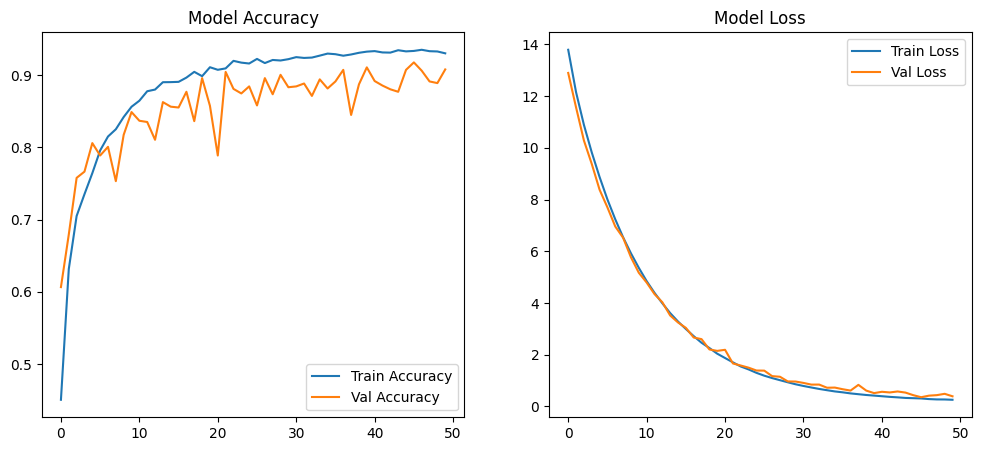

In [20]:
import matplotlib.pyplot as plt

# Plot accuracy & loss
plt.figure(figsize=(12, 5))

# Accuracy Plot
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Val Accuracy')
plt.legend()
plt.title("Model Accuracy")

# Loss Plot
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Val Loss')
plt.legend()
plt.title("Model Loss")

plt.show()


# VGG19 hypertune adam


In [24]:
from tensorflow.keras.applications import VGG19
from tensorflow.keras.layers import Flatten, Dense, Dropout
from tensorflow.keras.models import Model
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.metrics import Precision, Recall

# Load Pretrained VGG19
vgg_model = VGG19(weights="imagenet", include_top=False, input_shape=(128, 128, 3))

# Freeze all but last 5 layers
for layer in vgg_model.layers[:-10]:  
    layer.trainable = False

x = Flatten()(vgg_model.output)
x = Dense(512, activation='relu', kernel_regularizer='l2')(x)  # Added L2 regularization
x = Dropout(0.4)(x)  
x = Dense(256, activation='relu', kernel_regularizer='l2')(x)
x = Dropout(0.3)(x)
output = Dense(6, activation='softmax')(x)

model = Model(inputs=vgg_model.input, outputs=output)


model.compile(optimizer=Adam(learning_rate=1e-4),  
              loss='categorical_crossentropy',
              metrics=METRICS)

from collections import Counter
counter = Counter(train_generator.classes)                          
max_val = float(max(counter.values()))       
class_weights = {class_id : round(max_val/num_images,2) for class_id, num_images in counter.items()}  

lrd = ReduceLROnPlateau(monitor = 'val_loss',patience = PATIENCE,verbose = 1,factor = 0.50, min_lr = 1e-10)
mcp = ModelCheckpoint('model.keras')
es = EarlyStopping(verbose=1, patience=20)

history=model.fit(train_generator,
                  validation_data=val_generator,
                  epochs = 50,
                  verbose =1,
                  callbacks = [lrd,mcp,es], 
                  class_weight = class_weights)


In [25]:
model.summary()

Model: "functional_4"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ input_layer_4 (InputLayer)           │ (None, 128, 128, 3)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block1_conv1 (Conv2D)                │ (None, 128, 128, 64)        │           1,792 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block1_conv2 (Conv2D)                │ (None, 128, 128, 64)        │          36,928 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block1_pool (MaxPooling2D)           │ (None, 64, 64, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block2_conv1 (Conv2D)                │ (None, 64, 64, 128)         │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block2_conv2 (Conv2D)                │ (None, 64, 64, 128)         │         147,584 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block2_pool (MaxPooling2D)           │ (None, 32, 32, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block3_conv1 (Conv2D)                │ (None, 32, 32, 256)         │         295,168 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block3_conv2 (Conv2D)                │ (None, 32, 32, 256)         │         590,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block3_conv3 (Conv2D)                │ (None, 32, 32, 256)         │         590,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block3_conv4 (Conv2D)                │ (None, 32, 32, 256)         │         590,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block3_pool (MaxPooling2D)           │ (None, 16, 16, 256)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block4_conv1 (Conv2D)                │ (None, 16, 16, 512)         │       1,180,160 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block4_conv2 (Conv2D)                │ (None, 16, 16, 512)         │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block4_conv3 (Conv2D)                │ (None, 16, 16, 512)         │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block4_conv4 (Conv2D)                │ (None, 16, 16, 512)         │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block4_pool (MaxPooling2D)           │ (None, 8, 8, 512)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block5_conv1 (Conv2D)                │ (None, 8, 8, 512)           │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block5_conv2 (Conv2D)                │ (None, 8, 8, 512)           │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block5_conv3 (Conv2D)                │ (None, 8, 8, 512)           │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block5_conv4 (Conv2D)                │ (None, 8, 8, 512)           │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼──────────────

 Total params: 24,352,070 (92.90 MB)

 Trainable params: 22,026,502 (84.02 MB)

 Non-trainable params: 2,325,568 (8.87 MB)

In [26]:
plot_graph(history)

Epoch 1/50
255/255 ━━━━━━━━━━━━━━━━━━━━ 69s 239ms/step - accuracy: 0.3572 - f1_m: 0.2039 - loss: 12.6929 - precision_m: 0.4457 - recall_m: 0.1422 - val_accuracy: 0.6455 - val_f1_m: 0.5915 - val_loss: 8.1592 - val_precision_m: 0.7443 - val_recall_m: 0.4936
Epoch 2/50
255/255 ━━━━━━━━━━━━━━━━━━━━ 46s 175ms/step - accuracy: 0.6243 - f1_m: 0.5902 - loss: 7.5082 - precision_m: 0.7295 - recall_m: 0.5015 - val_accuracy: 0.7085 - val_f1_m: 0.6937 - val_loss: 5.7245 - val_precision_m: 0.7466 - val_recall_m: 0.6497
Epoch 3/50
255/255 ━━━━━━━━━━━━━━━━━━━━ 46s 177ms/step - accuracy: 0.7103 - f1_m: 0.6914 - loss: 5.3922 - precision_m: 0.7664 - recall_m: 0.6322 - val_accuracy: 0.7194 - val_f1_m: 0.7208 - val_loss: 4.5966 - val_precision_m: 0.7579 - val_recall_m: 0.6881
Epoch 4/50
255/255 ━━━━━━━━━━━━━━━━━━━━ 47s 178ms/step - accuracy: 0.7785 - f1_m: 0.7664 - loss: 4.2070 - precision_m: 0.8181 - recall_m: 0.7222 - val_accuracy: 0.7566 - val_f1_m: 0.7605 - val_loss: 3.7495 - val_precision_m: 0.8072 - 

In [27]:
model.save("/kaggle/working/vgg19hypertuneadam.h5")

In [28]:
vgg19ht=model.evaluate(test_generator)

55/55 ━━━━━━━━━━━━━━━━━━━━ 5s 93ms/step - accuracy: 0.7344 - f1_m: 0.7345 - loss: 0.8029 - precision_m: 0.7400 - recall_m: 0.7292


In [ ]:
plot_model(model, to_file='densenet121.png', show_shapes=True, show_layer_names=True)

## VGG16

In [64]:
BS = 64
EPOCHS = 50
ADAM_LEARNING_RATE = 0.0001
PATIENCE =10


from tensorflow.keras.models import Model, Sequential
from tensorflow.keras.applications import VGG16
from tensorflow.keras.layers import Dense, Flatten, Dropout,BatchNormalization ,Activation, GlobalAveragePooling2D
from tensorflow.keras.layers import GaussianNoise
from tensorflow.keras import regularizers

from tensorflow.keras.optimizers import Adam
from sklearn.metrics import classification_report, confusion_matrix
from tensorflow.keras.callbacks import ReduceLROnPlateau,ModelCheckpoint,EarlyStopping


base_model = tf.keras.applications.VGG16(input_shape= (128,128,3),include_top=False,weights="imagenet")
base_model.summary()


for layer in base_model.layers[:11]:
    layer.trainable=False


model=Sequential()
model.add(base_model)
model.add(BatchNormalization())
model.add(GaussianNoise(0.01))
model.add(GlobalAveragePooling2D())

model.add(Flatten())
model.add(Dense(256, activation='relu',kernel_regularizer=regularizers.l2(0.001),bias_regularizer=regularizers.l2(0.001)))
model.add(BatchNormalization())
model.add(Dropout(0.5))

model.add(Dense(128, activation='relu',kernel_regularizer=regularizers.l2(0.001),bias_regularizer=regularizers.l2(0.001)))
model.add(BatchNormalization())
model.add(Dropout(0.5))

model.add(Dense(6, activation="softmax"))

model.summary()

# Compile model



adam = tf.keras.optimizers.Adam(learning_rate=ADAM_LEARNING_RATE, beta_1=0.9, beta_2=0.999, epsilon=1e-08, decay=0.0)

model.compile(optimizer=adam, loss='categorical_crossentropy',metrics=METRICS)


# Run Model
from collections import Counter
counter = Counter(train_generator.classes)                          
max_val = float(max(counter.values()))       
class_weights = {class_id : round(max_val/num_images,2) for class_id, num_images in counter.items()}  

lrd = ReduceLROnPlateau(monitor = 'val_loss',patience = PATIENCE,verbose = 1,factor = 0.50, min_lr = 1e-10)
mcp = ModelCheckpoint('model.keras')
es = EarlyStopping(verbose=1, patience=20)

history=model.fit(train_generator,
                  validation_data=val_generator,
                  epochs = EPOCHS,
                  verbose =1,
                  callbacks = [lrd,mcp,es], 
                  class_weight = class_weights)


model.save("/kaggle/working/VGG16tune.h5")

58889256/58889256 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


Model: "vgg16"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ input_layer_14 (InputLayer)          │ (None, 128, 128, 3)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block1_conv1 (Conv2D)                │ (None, 128, 128, 64)        │           1,792 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block1_conv2 (Conv2D)                │ (None, 128, 128, 64)        │          36,928 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block1_pool (MaxPooling2D)           │ (None, 64, 64, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block2_conv1 (Conv2D)                │ (None, 64, 64, 128)         │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block2_conv2 (Conv2D)                │ (None, 64, 64, 128)         │         147,584 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block2_pool (MaxPooling2D)           │ (None, 32, 32, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block3_conv1 (Conv2D)                │ (None, 32, 32, 256)         │         295,168 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block3_conv2 (Conv2D)                │ (None, 32, 32, 256)         │         590,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block3_conv3 (Conv2D)                │ (None, 32, 32, 256)         │         590,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block3_pool (MaxPooling2D)           │ (None, 16, 16, 256)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block4_conv1 (Conv2D)                │ (None, 16, 16, 512)         │       1,180,160 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block4_conv2 (Conv2D)                │ (None, 16, 16, 512)         │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block4_conv3 (Conv2D)                │ (None, 16, 16, 512)         │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block4_pool (MaxPooling2D)           │ (None, 8, 8, 512)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block5_conv1 (Conv2D)                │ (None, 8, 8, 512)           │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block5_conv2 (Conv2D)                │ (None, 8, 8, 512)           │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block5_conv3 (Conv2D)                │ (None, 8, 8, 512)           │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block5_pool (MaxPooling2D)           │ (None, 4, 4, 512)           │               0 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 14,714,688 (56.13 MB)

 Trainable params: 14,714,688 (56.13 MB)

 Non-trainable params: 0 (0.00 B)

Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ vgg16 (Functional)                   │ (None, 4, 4, 512)           │      14,714,688 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_188              │ (None, 4, 4, 512)           │           2,048 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ gaussian_noise (GaussianNoise)       │ (None, 4, 4, 512)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ global_average_pooling2d_10          │ (None, 512)                 │               0 │
│ (GlobalAveragePooling2D)             │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_2 (Flatten)                  │ (None, 512)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_26 (Dense)                     │ (None, 256)                 │         131,328 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_189              │ (None, 256)                 │           1,024 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_14 (Dropout)                 │ (None, 256)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_27 (Dense)                     │ (None, 128)                 │          32,896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_190              │ (None, 128)                 │             512 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_15 (Dropout)                 │ (None, 128)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_28 (Dense)                     │ (None, 6)                   │             774 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 14,883,270 (56.78 MB)

 Trainable params: 13,145,990 (50.15 MB)

 Non-trainable params: 1,737,280 (6.63 MB)

/usr/local/lib/python3.11/dist-packages/keras/src/optimizers/base_optimizer.py:33: UserWarning: Argument `decay` is no longer supported and will be ignored.
  warnings.warn(


Epoch 1/50
255/255 ━━━━━━━━━━━━━━━━━━━━ 59s 184ms/step - accuracy: 0.8449 - auc: 0.7897 - f1_score: 0.2075 - loss: 3.7969 - precision: 0.5400 - recall: 0.4107 - val_accuracy: 0.8130 - val_auc: 0.7001 - val_f1_score: 0.3174 - val_loss: 2.6480 - val_precision: 0.4063 - val_recall: 0.2646 - learning_rate: 1.0000e-04
Epoch 2/50
255/255 ━━━━━━━━━━━━━━━━━━━━ 40s 152ms/step - accuracy: 0.8287 - auc: 0.7836 - f1_score: 0.4051 - loss: 2.7008 - precision: 0.4809 - recall: 0.3515 - val_accuracy: 0.8314 - val_auc: 0.8053 - val_f1_score: 0.4422 - val_loss: 2.2238 - val_precision: 0.4930 - val_recall: 0.4026 - learning_rate: 1.0000e-04
Epoch 3/50
255/255 ━━━━━━━━━━━━━━━━━━━━ 39s 148ms/step - accuracy: 0.8635 - auc: 0.8643 - f1_score: 0.5396 - loss: 2.1500 - precision: 0.6156 - recall: 0.4817 - val_accuracy: 0.8661 - val_auc: 0.8896 - val_f1_score: 0.5657 - val_loss: 1.6328 - val_precision: 0.6147 - val_recall: 0.5263 - learning_rate: 1.0000e-04
Epoch 4/50
255/255 ━━━━━━━━━━━━━━━━━━━━ 39s 148ms/step 

In [65]:
vgg16ht=model.evaluate(test_generator)

55/55 ━━━━━━━━━━━━━━━━━━━━ 3s 56ms/step - accuracy: 0.9499 - auc: 0.9856 - f1_score: 0.8490 - loss: 0.5263 - precision: 0.8531 - recall: 0.8448


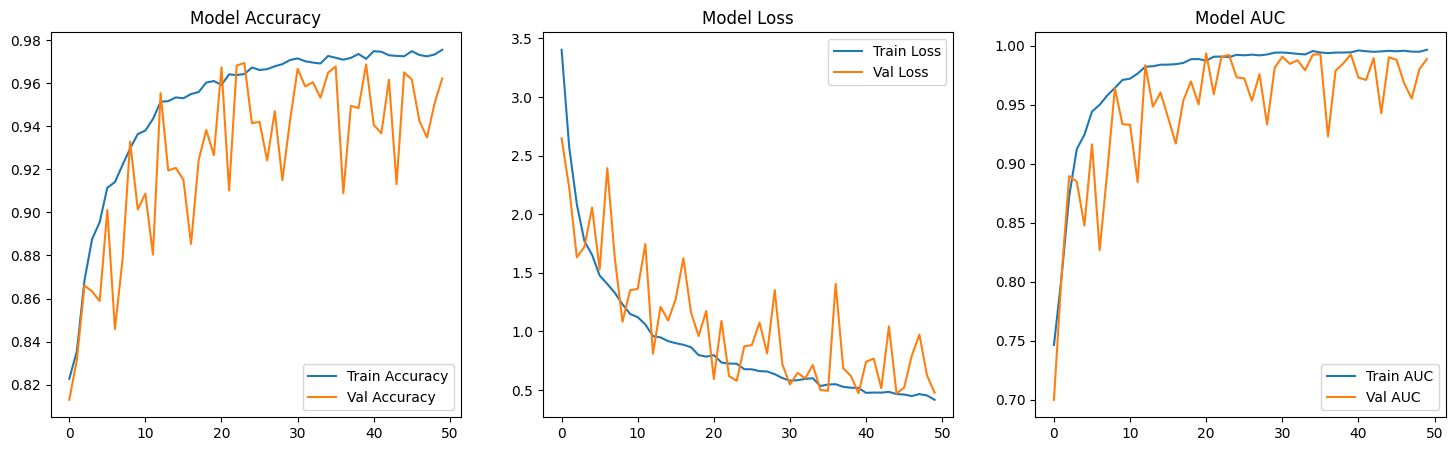

In [67]:
plot_graph(history)

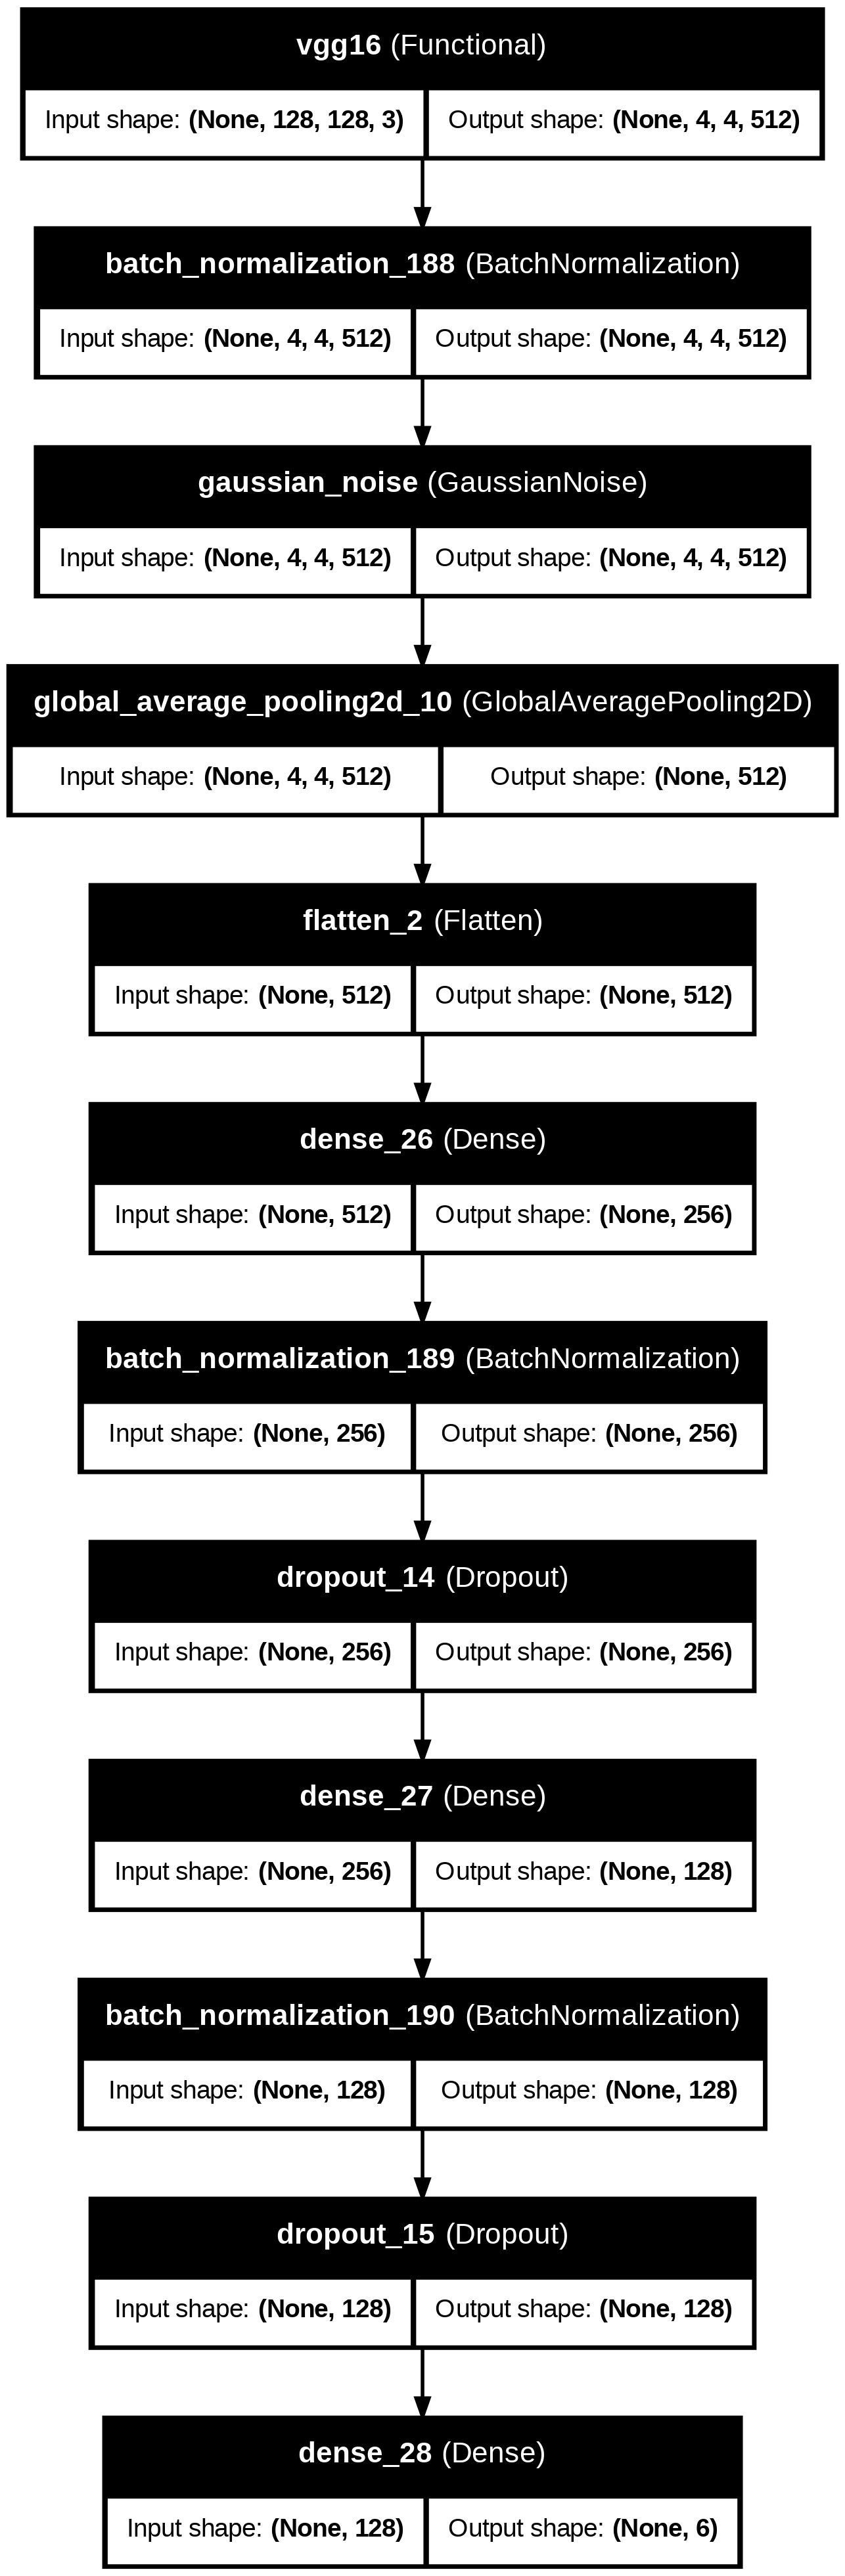

In [69]:
plot_model(model, to_file='vgg16.png', show_shapes=True, show_layer_names=True)